# Description

It gets the PCA transformation of an input file.

# Modules loading

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

import conf
from utils import generate_result_set_name

# Settings

In [3]:
INPUT_FILEPATH = Path(
    conf.RESULTS['PROJECTIONS_DIR'],
    'projection-smultixcan-mashr-zscores.pkl'
).resolve()
display(INPUT_FILEPATH)

input_filepath_stem = INPUT_FILEPATH.stem
display(input_filepath_stem)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/projections/projection-smultixcan-mashr-zscores.pkl')

'projection-smultixcan-mashr-zscores'

In [4]:
# number of components to use in the dimensionality reduction step
DR_OPTIONS = {
    'n_components': 50,
    'svd_solver': 'full',
    'random_state': 0,
}

In [5]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    'pca'
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/data_transformations/pca')

In [6]:
# dictionary containing all options/settings (used to generate filenames)
ALL_OPTIONS = DR_OPTIONS.copy()
# ALL_OPTIONS['proj_percentile'] = PERCENTILE_NAME

display(ALL_OPTIONS)

{'n_components': 50, 'svd_solver': 'full', 'random_state': 0}

# Load input file

In [7]:
data = pd.read_pickle(INPUT_FILEPATH).T

In [8]:
data.shape

(4091, 987)

In [9]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
20096_1-Size_of_red_wine_glass_drunk_small_125ml,-0.026255,-0.006253,-0.002729,0.042319,-0.025975,0.022122,0.004249,-0.015139,-0.001912,-0.021863,...,-0.024305,-0.021982,-0.020533,-0.001901,-0.019043,0.006065,-0.042334,-0.025743,0.003379,0.003053
2345-Ever_had_bowel_cancer_screening,0.006045,-0.023996,0.051637,-0.023236,0.002167,-0.009903,-0.036104,0.008751,0.004731,0.035955,...,0.030414,0.015316,0.023236,0.040670,0.002873,0.007549,0.043547,-0.037085,0.043986,0.001230
N49-Diagnoses_main_ICD10_N49_Inflammatory_disorders_of_male_genital_organs_not_elsewhere_classified,0.007276,0.037932,-0.013182,0.063016,-0.022646,0.013733,0.022293,-0.020302,-0.005819,-0.026274,...,0.002066,-0.006492,-0.003635,0.017402,-0.034985,0.032009,-0.009513,0.020852,0.005649,-0.003510
100011_raw-Iron,-0.029740,-0.000018,-0.001663,-0.002628,0.004559,0.026327,0.000334,0.057850,-0.011335,0.036659,...,0.017457,0.026494,-0.018653,0.016464,0.013154,-0.022661,0.013973,0.033139,-0.049358,-0.030986
5221-Index_of_best_refractometry_result_right,-0.001949,-0.016128,0.035221,-0.046487,0.004649,-0.032353,0.002471,0.006538,0.001404,0.039243,...,0.038107,-0.005864,-0.011039,0.013418,-0.010531,-0.026655,-0.020884,-0.024993,0.011461,0.016251


# PCA

In [11]:
dr_obj = PCA(**DR_OPTIONS)
display(dr_obj)

PCA(n_components=50, random_state=0, svd_solver='full')

In [12]:
dr_obj = dr_obj.fit(data)

In [13]:
dr_data = dr_obj.transform(data)

In [14]:
dr_data = pd.DataFrame(
    data=dr_data,
    index=data.index.copy(),
    columns=[f'PCA{i+1}' for i in range(dr_data.shape[1])]
)

In [15]:
dr_data.shape

(4091, 50)

In [16]:
dr_data.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA41,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,PCA50
20096_1-Size_of_red_wine_glass_drunk_small_125ml,-0.100591,-0.014292,0.064443,0.037092,0.021729,0.033115,0.042635,-0.049560,0.039413,0.020285,...,-0.019653,-0.025835,0.003075,0.052396,0.007455,-0.049393,-0.103594,0.065488,0.004220,0.001405
2345-Ever_had_bowel_cancer_screening,-0.001184,0.000133,-0.043589,-0.009708,0.029471,-0.000570,-0.022543,0.029407,-0.041994,-0.002859,...,0.016850,0.002407,-0.047774,-0.039908,-0.024655,-0.026568,-0.024480,0.013882,0.003626,0.001784
N49-Diagnoses_main_ICD10_N49_Inflammatory_disorders_of_male_genital_organs_not_elsewhere_classified,-0.066040,0.022676,0.032242,0.003698,0.065979,0.000559,0.023778,0.046139,0.037570,-0.023876,...,-0.035932,-0.002729,0.001960,0.055015,-0.028864,0.019337,0.016917,0.005223,0.020110,-0.006227
100011_raw-Iron,0.004515,-0.024220,-0.018276,0.029885,0.015644,-0.004309,-0.020658,-0.039823,-0.019333,-0.007418,...,-0.007287,-0.082876,0.138801,-0.001060,-0.004481,0.047746,0.004058,0.021489,-0.039719,-0.029061
5221-Index_of_best_refractometry_result_right,-0.077962,-0.000238,-0.050635,0.008383,0.032066,0.048165,0.002073,0.052781,0.042394,0.057097,...,-0.072350,0.000479,-0.037425,-0.054001,-0.010331,0.000407,-0.020796,-0.024839,-0.072091,0.068569


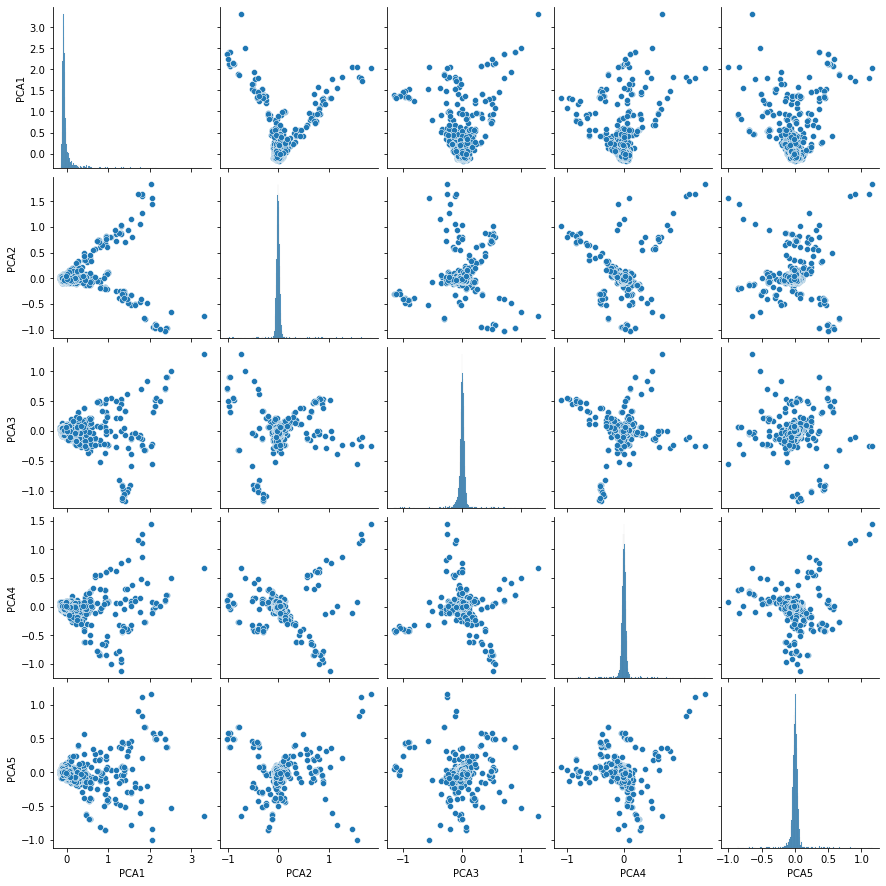

In [17]:
g = sns.pairplot(data=dr_data.iloc[:,:5])

# Save

In [18]:
output_file = Path(
    RESULTS_DIR,
    generate_result_set_name(
        ALL_OPTIONS,
        prefix=f'pca-{input_filepath_stem}-',
        suffix='.pkl'
    )
).resolve()

display(output_file)

PosixPath('/media/miltondp/Elements1/projects/phenoplier/results/data_transformations/pca/pca-projection-smultixcan-mashr-zscores-n_components_50-random_state_0-svd_solver_full.pkl')

In [19]:
dr_data.to_pickle(output_file)